# Applied Machine Learning Final Project

Name: Jiayi Zhu <br>
Date: April 18, 2022 <br>
Topic: Maternal Health Risk Data <br>
Data: https://www.kaggle.com/datasets/csafrit2/maternal-health-risk-data

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV

### Load In and Prepare Data

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


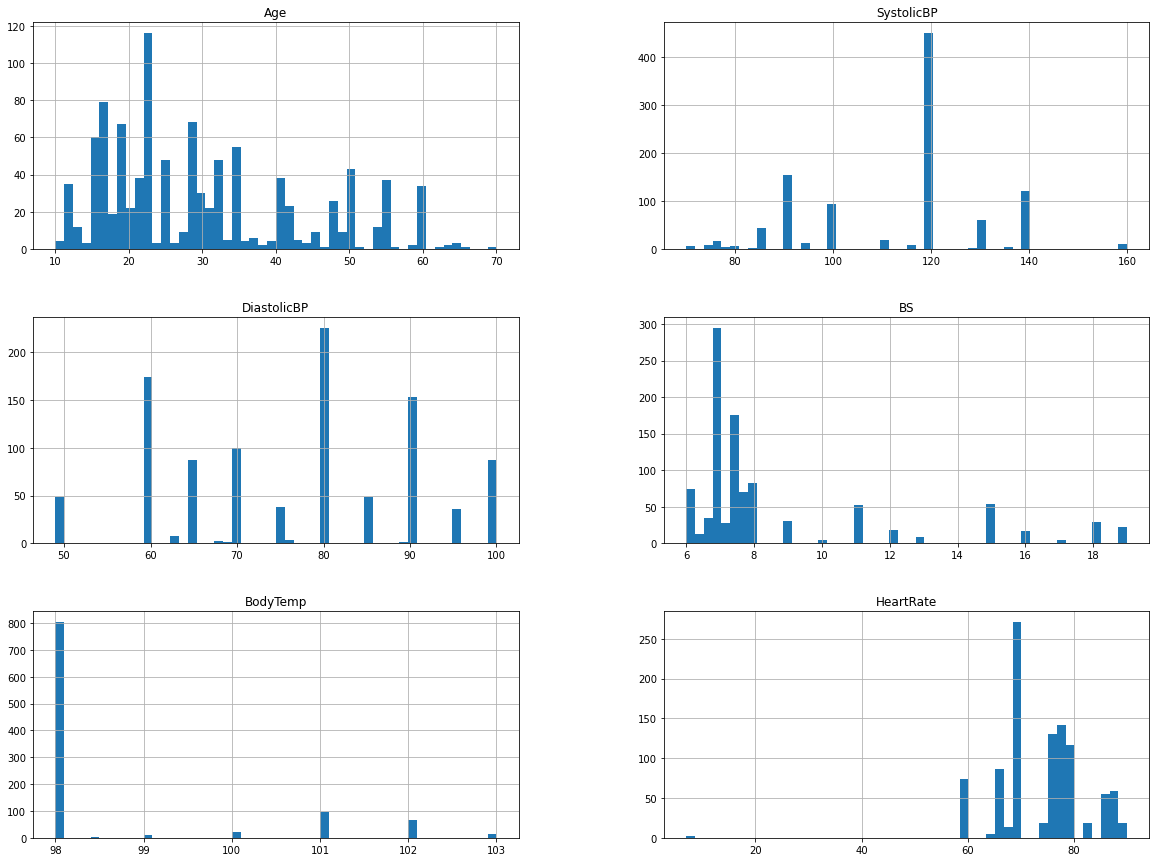

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
# split up x and y
x = df.drop(['RiskLevel'], axis=1)
y = pd.DataFrame(df['RiskLevel'])

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

x_prepared = pd.DataFrame(num_pipeline.fit_transform(x)) # scale numerical data
encoder = OrdinalEncoder()
y_prepared = pd.DataFrame(encoder.fit_transform(y))
# 0 = high risk
# 1 = low risk
# 2 = mid risk
#y_prepared.head()

## Train Models

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# best one!
forest = RandomForestClassifier(random_state=50)
cv = KFold(n_splits=5, random_state=None)

n_scores = cross_val_score(forest, x_prepared,
                                    y_prepared, scoring='accuracy', cv=cv,
                                    n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.087)


In [7]:
# hyperparameter tuning with GridSearchCV
param_grid = [{'n_estimators': [150, 175, 200], 'max_depth': [15, 20, 25], 'max_features': [1, 2, 3]}]

grid_search = GridSearchCV(forest, param_grid, cv=cv,
                           scoring='accuracy', n_jobs=-1, error_score='raise',
                           return_train_score=True)

grid_search.fit(x_prepared, y_prepared)
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, max_features=1, n_estimators=150,
                       random_state=50)

In [8]:
forest = RandomForestClassifier(n_estimators=150, max_depth=15, max_features=1, random_state=50)
cv = KFold(n_splits=5, random_state=None)

n_scores = cross_val_score(forest, x_prepared,
                                    y_prepared, scoring='accuracy', cv=cv,
                                    n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.850 (0.072)


In [29]:
# test our trained model with a hypothetical user input

user_input = [30, 120, 80, 6.9, 101, 76]
# convert input to standardized values using mean and std values from describe() table
user_input[0] = (user_input[0] - 29.871795) / 13.474386
user_input[1] = (user_input[1] - 113.198225) / 18.403913
user_input[2] = (user_input[2] - 76.460552) / 13.885796
user_input[3] = (user_input[3] - 8.725986) / 3.293532
user_input[4] = (user_input[4] - 98.665089) / 1.371384
user_input[5] = (user_input[5] - 74.301775) / 8.088702
print(user_input)


[0.009514719260677349, 0.36958308811827173, 0.2548970185072569, -0.5544157457708018, 1.702594605158005, 0.2099502491252606]


In [30]:
user_input = np.array(user_input)
user_input = user_input.reshape(1, -1)
forest.fit(x_prepared, y_prepared)
prediction = forest.predict(user_input)
print(prediction)

[2.]


In [32]:
if prediction == 2:
    print('mid-risk')
elif prediction == 1:
    print('low-risk')
else:
    print('high-risk')

mid-risk


### Model Graveyard (bad models)

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5)
cv = KFold(n_splits=5, random_state=None)

n_scores = cross_val_score(knn, x_prepared,
                                    y_prepared, scoring='accuracy', cv=cv,
                                    n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.680 (0.060)


In [19]:
sgd = SGDClassifier(random_state=50)
cv = KFold(n_splits=5, random_state=None)

n_scores = cross_val_score(sgd, x_prepared, y_prepared, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.602 (0.099)
